In [ ]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset from Google Drive
data_path = '/content/drive/My Drive/train.csv'  # Update this path if needed
data = pd.read_csv(data_path)

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
class PassiveAggressiveClassifier:
    def __init__(self, max_iter=1000):
        self.max_iter = max_iter
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                # Calculate the margin
                margin = y[idx] * (np.dot(x_i, self.weights) + self.bias)

                # Compute the hinge loss
                loss = max(0, 1 - margin)

                if loss > 0:
                    # Update step size
                    tau = loss / (np.linalg.norm(x_i) ** 2)

                    # Update weights and bias
                    self.weights += tau * y[idx] * x_i
                    self.bias += tau * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)


# Handle NaN values in the 'text' column by filling them with empty strings
data['text'].fillna('', inplace=True)

# Reduce dataset to 500 samples
data = data.sample(n=500, random_state=42)

# Using 'text' as features and 'label' as target
X = data['text'].values
y = data['label'].values

# Convert labels to +1 and -1 (assuming binary classification with labels 1 and 0)
y = np.where(y == 1, 1, -1)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
pa = PassiveAggressiveClassifier(max_iter=1000)
pa.fit(X_train, y_train)



Accuracy: 0.82


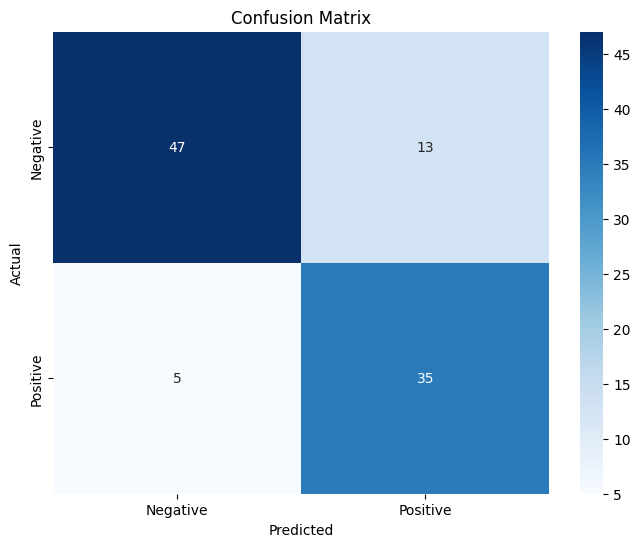

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt
# Test the classifier
predictions = pa.predict(X_test)
# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [8]:
# Example usage for new input
new_input = ["Sample news text for prediction"]  # Replace with your new input text
new_input_vect = vectorizer.transform(new_input).toarray()
new_predictions = pa.predict(new_input_vect)
if (new_predictions[0]==0):
     print('The news is Real')
else:
     print('The news is Fake')



The news is Fake
